In [ ]:
# Imports

import kagglehub
import pandas as pd
import opencc
import numpy as np
import string
import matplotlib.pyplot as plt

In [2]:
#Function that takes a sentence and return true if its in simplified chinese, false otherwise


simplified_converter = opencc.OpenCC('t2s')  
traditional_converter = opencc.OpenCC('s2t') 

def isSimplified(sentence):

    if not isinstance(sentence, str):
        return False 
     
    simplified = simplified_converter.convert(sentence)
    traditional = traditional_converter.convert(sentence)

    return sentence == simplified and sentence != traditional


In [ ]:
# Dataset from Kaggle
path = kagglehub.dataset_download("ceshine/yet-another-chinese-news-dataset")

print("Path to dataset files:", path)

In [3]:

# Read the input CSV
df = pd.read_csv("news_collection.csv")
print("Total number of articles : " + str(df.shape[0]))

# Initialize empty DataFrames with the same columns as the original DataFrame
dfTrad = pd.DataFrame(columns=df.columns)
dfSimp = pd.DataFrame(columns=df.columns)


# Lists to store rows
simp_rows = []
trad_rows = []

# Iterate through rows of the DataFrame
for index, row in df.iterrows():
    if isSimplified(row['desc']):
        simp_rows.append(row.to_dict())
    else:
        trad_rows.append(row.to_dict()) 


dfSimp = pd.DataFrame(simp_rows)
dfTrad = pd.DataFrame(trad_rows)


print(f"Total Simplified Rows: {len(dfSimp)}")
print(f"Total Traditional Rows: {len(dfTrad)}")


Total number of articles : 142663
Total Simplified Rows: 37182
Total Traditional Rows: 105481


### Traditional VS simplified
See if the most used characters are the same in simplified and traditional articles

In [6]:
dicS = {}
dicT = {}



# All the character we want to remove from the result
keys_to_remove = [
    "，", "。","0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10", " ",
    "「", "」", "《", "》",",",'“' , '”',"、"
]
keys_to_remove.extend(list(string.ascii_lowercase)) 
keys_to_remove.extend(list(string.ascii_uppercase)) 


for index, row in dfSimp.iterrows():
    desc = row["desc"]
    if isinstance(desc, str): 
        for i in desc:
            if i in dicS:  
                dicS[i] += 1 
            else:
                dicS[i] = 1  


for index, row in dfTrad.iterrows():
    desc = row["desc"]
    if isinstance(desc, str):  
        for i in desc:
            if i in dicT:  
                dicT[i] += 1 
            else:
                dicT[i] = 1  


sorted_dicS = dict(sorted(dicS.items(), key=lambda item: item[1], reverse=True))
sorted_dicT = dict(sorted(dicT.items(), key=lambda item: item[1], reverse=True))


for key in keys_to_remove:
    if key in sorted_dicS:
        del sorted_dicS[key]
    if key in sorted_dicT:
        del sorted_dicT[key]




In [11]:
print("Number of characters use in simplified texts : " + str(len(sorted_dicS)))
print("Number of characters use in traditional texts : " + str(len(sorted_dicT)))


print("Ten most used characters in both dictionnaries")
print("Simplified:")
for i, (char, freq) in enumerate(sorted_dicS.items()):
    if i < 20:  
        print(f"{char}: {freq}")

print("Traditional:")
for i, (char, freq) in enumerate(sorted_dicT.items()):
    if i < 20:  
        print(f"{char}: {freq}")


Number of characters use in simplified texts : 4966
Number of characters use in traditional texts : 7453
Ten most used characters in both dictionnaries
Simplified:
的: 86298
国: 62658
中: 37978
在: 33361
一: 28880
美: 26058
人: 24516
日: 18914
大: 17742
会: 17543
年: 17497
为: 17363
是: 17207
有: 16663
不: 14823
对: 14800
和: 14410
了: 13877
发: 13532
月: 13327
Traditional:
的: 180610
國: 127572
中: 77312
在: 75597
人: 69322
日: 66828
台: 66740
會: 65682
一: 64997
是: 57843
今: 56767
不: 56252
大: 53559
有: 51682
天: 51440
民: 50671
年: 49160
長: 45332
出: 44967
為: 43581


In [7]:


# Total characters used
print(sum(sorted_dicS.values()))
print(sum(sorted_dicT.values()))

# Replace the values by frequency of use
for i in sorted_dicS.keys() :
    sorted_dicS[i] = sorted_dicS[i]/sum(sorted_dicS.values())

for i in sorted_dicT.keys() :
    sorted_dicT[i] = sorted_dicT[i]/sum(sorted_dicT.values())




2940531
8896738


In [11]:
# display the first 10 elements by frequency

print("Simplified:")
for i, (char, freq) in enumerate(sorted_dicS.items()):
    if i < 10:
        print(f"{char}: {freq}")

print("Traditional:")
for i, (char, freq) in enumerate(sorted_dicT.items()):
    if i < 10: 
        print(f"{char}: {freq}")

Simplified:
的: 0.029347760659554346
国: 0.02195265745849714
中: 0.01360450616662033
在: 0.012115425464819007
一: 0.010616725601122872
美: 0.009682107885946112
人: 0.009198220651062914
日: 0.00716227209860313
大: 0.006766930764911698
会: 0.006736616887430699
Traditional:
的: 0.020300698975287346
國: 0.014636315540899876
中: 0.009001746007769627
在: 0.00888201532111349
人: 0.008217745427936032
日: 0.007987736492718174
台: 0.008041451119860482
會: 0.007978129244570666
一: 0.007958418322737288
是: 0.007139279495459883


In [9]:
# Select the 20 most used ones

finalDicS =  {}
finalDicT =  {}

for i, (char, freq) in enumerate(sorted_dicS.items()):
    if i < 20:
        finalDicS[char] =  freq


for i, (char, freq) in enumerate(sorted_dicT.items()):
    if i < 20:
        finalDicT[char] =  freq


print(finalDicS)
print(finalDicT)




{'的': 0.029347760659554346, '国': 0.02195265745849714, '中': 0.01360450616662033, '在': 0.012115425464819007, '一': 0.010616725601122872, '美': 0.009682107885946112, '人': 0.009198220651062914, '日': 0.00716227209860313, '大': 0.006766930764911698, '会': 0.006736616887430699, '年': 0.006764522592032117, '为': 0.006758434359427029, '是': 0.006743286419089346, '有': 0.006574430396416414, '不': 0.0058871582627091175, '对': 0.0059128332678683795, '和': 0.005791264890974682, '了': 0.005609542746569055, '发': 0.005500940072634839, '月': 0.005447571566915378}
{'的': 0.020300698975287346, '國': 0.014636315540899876, '中': 0.009001746007769627, '在': 0.00888201532111349, '人': 0.008217745427936032, '日': 0.007987736492718174, '台': 0.008041451119860482, '會': 0.007978129244570666, '一': 0.007958418322737288, '是': 0.007139279495459883, '今': 0.007056854914519727, '不': 0.0070425320320579455, '大': 0.006752936652907294, '有': 0.0065605800311180065, '天': 0.0065729828119274235, '民': 0.006517560101768586, '年': 0.006364689889001874

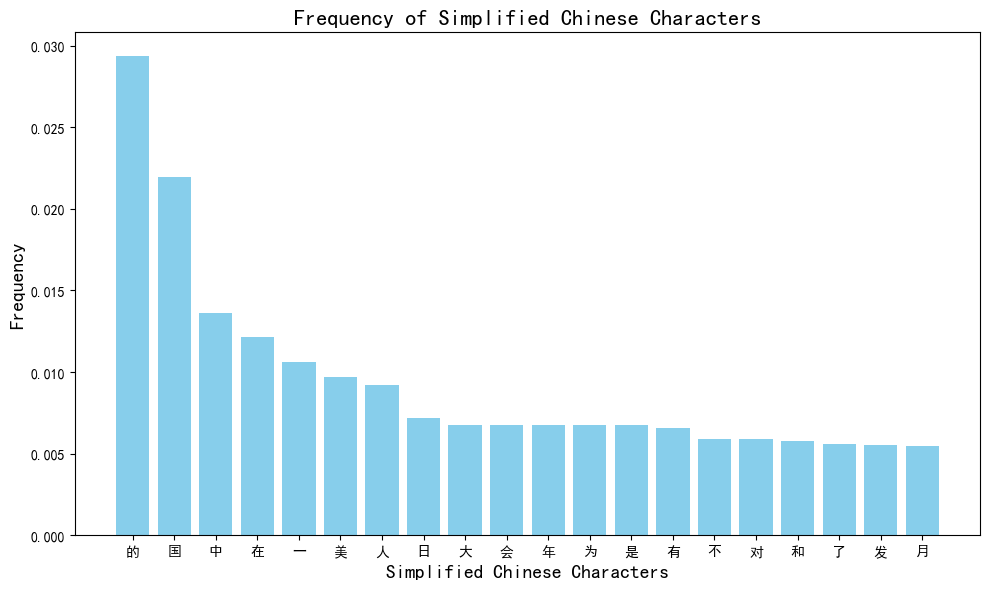

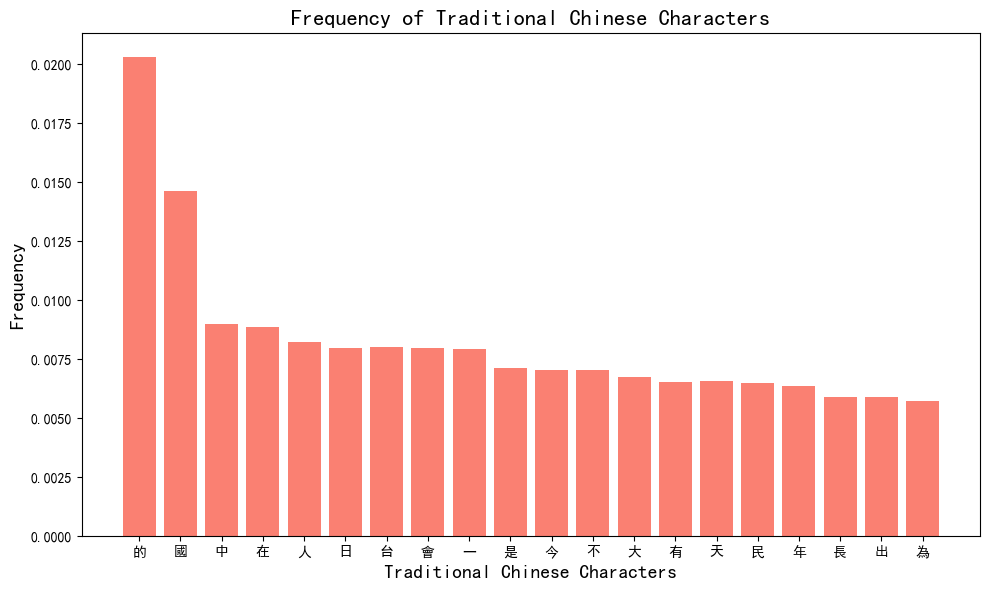

In [10]:
from matplotlib import rcParams


# Set font for Chinese characters
rcParams['font.sans-serif'] = ['SimHei']  # Use SimHei for Chinese
rcParams['axes.unicode_minus'] = False   # Avoid issues with minus signs



# Bar diagram for Simplified characters
plt.figure(figsize=(10, 6))
plt.bar(finalDicS.keys(), finalDicS.values(), color='skyblue')
plt.xlabel("Simplified Chinese Characters", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title("Frequency of Simplified Chinese Characters", fontsize=16)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Bar diagram for Traditional characters
plt.figure(figsize=(10, 6))
plt.bar(finalDicT.keys(), finalDicT.values(), color='salmon')
plt.xlabel("Traditional Chinese Characters", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title("Frequency of Traditional Chinese Characters", fontsize=16)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
